<a href="https://colab.research.google.com/github/AwesomeDemoGuy/Sarcasm-Detector/blob/master/SarcasmDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
file_path = "drive/MyDrive/Sarcasm_Headlines_Dataset.json"

import pandas as pd   # Great for tables (google spreadsheets, microsoft excel, csv). 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import spacy
import wordcloud
import os # Good for navigating your computer's files 
import sys
pd.options.mode.chained_assignment = None #suppress warnings

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from spacy.lang.en.stop_words import STOP_WORDS
nltk.download('wordnet')
nltk.download('punkt')

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
!python -m spacy download en_core_web_md
import en_core_web_md
text_to_nlp = en_core_web_md.load()
from sklearn.metrics import ConfusionMatrixDisplay
#from fast_ml.model_development import train_valid_test_split

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


2023-04-12 06:03:11.408663: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 19.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

In [ ]:
df = pd.read_json (file_path, lines = True)
display(df)

FileNotFoundError: ignored

In [ ]:
X = df["headline"]
y = df["is_sarcastic"]

In [ ]:
X_sample = df['headline'].sample(5000)
y_sample = y[X_sample.index]
display(X_sample)

25564    on the road to term 4, jerry brown dispenses w...
18211                                     man use big word
11531    teen weed users may face high risk for dependence
15554    chris tucker to focus attention on smaller, mo...
19080    betsy devos chooses to spotlight a problematic...
                               ...                        
419                 taylor swift now dating watertown boat
22152    whales beach selves in attempt to purchase 'th...
24933    gchat status disastrously left on visible duri...
15006    taylor swift enters alternate universe to date...
10669    this type of breast cancer is more deadly for ...
Name: headline, Length: 5000, dtype: object

In [ ]:

def tokenize(text):
    clean_tokens = []
    for token in text_to_nlp(text):

        #if (not token.is_stop) & (token.lemma_ != '-PRON-') & (not token.is_punct): # -PRON- is a special all inclusive "lemma" spaCy uses for any pronoun, we want to exclude these 
        clean_tokens.append(token.lemma_)
      
    return clean_tokens


In [ ]:
bow_transformer = CountVectorizer(analyzer=tokenize, max_features=400).fit(X_sample)

In [ ]:
bow_transformer.vocabulary_

In [ ]:
X_vec = bow_transformer.transform(X_sample)

In [ ]:
pd.DataFrame(X_vec.toarray())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_sample, test_size = 0.2, random_state = 101)

In [ ]:
logistic_model = LogisticRegression()

In [ ]:
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print (accuracy)

0.784


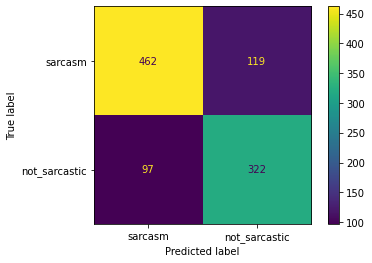

In [ ]:
c_matrix = confusion_matrix(y_test, y_pred)
c_display = ConfusionMatrixDisplay(c_matrix, display_labels = ['sarcasm', "not_sarcastic"])
c_display.plot()
plt.show()

In [ ]:
import tensorflow as tf
X_vec = X_vec.toarray()
print(X_vec)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_sample, test_size = 0.2, random_state = 101)
X_valid, X_test, y_valid, y_test= train_test_split(X_test, y_test, test_size = 0.5)

In [ ]:
X_valid.shape

(500, 400)

In [ ]:
model = Sequential()
model.add(Dense(100, input_dim = 400, activation = "relu"))
model.add(Dense(100, activation = "relu"))
model.add(Dense(100, activation = "relu"))
model.add(Dense(100, activation = "relu"))
model.add(Dense(1, activation ="sigmoid"))
# try huge layers

In [ ]:
print(X_train.shape)

(4000, 400)


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
validation_data = (X_valid, y_valid)
history = model.fit(X_train, y_train, validation_data = validation_data, epochs = 50)

Epoch 1/50
125/125 [==============================] - 3s 10ms/step - loss: 0.5631 - accuracy: 0.6960 - val_loss: 0.4775 - val_accuracy: 0.7660
Epoch 2/50
125/125 [==============================] - 1s 10ms/step - loss: 0.4011 - accuracy: 0.8232 - val_loss: 0.4513 - val_accuracy: 0.7780
Epoch 3/50
125/125 [==============================] - 2s 12ms/step - loss: 0.3123 - accuracy: 0.8675 - val_loss: 0.5048 - val_accuracy: 0.7680
Epoch 4/50
125/125 [==============================] - 1s 8ms/step - loss: 0.2180 - accuracy: 0.9122 - val_loss: 0.6215 - val_accuracy: 0.7660
Epoch 5/50
125/125 [==============================] - 1s 8ms/step - loss: 0.1447 - accuracy: 0.9448 - val_loss: 0.7405 - val_accuracy: 0.7600
Epoch 6/50
125/125 [==============================] - 1s 7ms/step - loss: 0.0943 - accuracy: 0.9645 - val_loss: 0.8705 - val_accuracy: 0.7740
Epoch 7/50
125/125 [==============================] - 1s 7ms/step - loss: 0.0614 - accuracy: 0.9735 - val_loss: 1.0108 - val_accuracy: 0.7520
Epo

In [ ]:
accuracy_score = model.evaluate(X_test, y_test)
print(accuracy_score)

16/16 [==============================] - 0s 2ms/step - loss: 2.9028 - accuracy: 0.7500
[2.902817726135254, 0.75]


In [ ]:
def plot_acc(history, ax = None, xlabel = 'Epoch #'):

    if hasattr(history, 'history_'):
      history = history.history_
    else:
      history = history.history
    history.update({'epoch':list(range(len(history['val_accuracy'])))})
    history = pd.DataFrame.from_dict(history)

    best_epoch = history.sort_values(by = 'val_accuracy', ascending = False).iloc[0]['epoch']

    if not ax:
      f, ax = plt.subplots(1,1)
    sns.lineplot(x = 'epoch', y = 'val_accuracy', data = history, label = 'Validation', ax = ax)
    sns.lineplot(x = 'epoch', y = 'accuracy', data = history, label = 'Training', ax = ax)
    ax.axhline(0.5, linestyle = '--',color='red', label = 'Chance')
    ax.axvline(x = best_epoch, linestyle = '--', color = 'green', label = 'Best Epoch')  
    ax.legend(loc = 7)    
    ax.set_ylim([0.4, 1])

    ax.set_xlabel(xlabel)
    ax.set_ylabel('Accuracy (Fraction)')

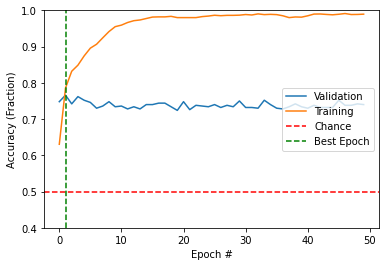

In [ ]:
plot_acc(history)

In [ ]:
def model_to_string(model):
    import re
    stringlist = []
    model.summary(print_fn=lambda x: stringlist.append(x))
    sms = "\n".join(stringlist)
    sms = re.sub('_\d\d\d','', sms)
    sms = re.sub('_\d\d','', sms)
    sms = re.sub('_\d','', sms)  
    return sms

In [ ]:
print(model_to_string(model))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)            (None, 20)                8020      
                                                                 
 dense (Dense)            (None, 20)                420       
                                                                 
 dense (Dense)            (None, 20)                420       
                                                                 
 dense (Dense)            (None, 15)                315       
                                                                 
 dense (Dense)            (None, 1)                 16        
                                                                 
Total params: 9,191
Trainable params: 9,191
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_pred = model.predict(X_test)
new_y_pred = []
for i in y_pred:
  if i[0] > 0.5:
    i = [1]
  else:
    i = [0]
  new_y_pred.append(i)

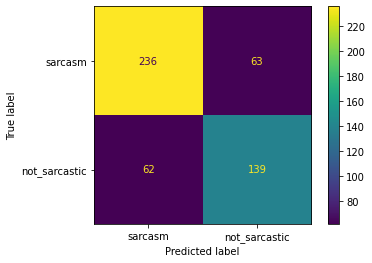

In [ ]:
c_matrix = confusion_matrix(y_test, new_y_pred)
c_display = ConfusionMatrixDisplay(c_matrix, display_labels = ['sarcasm', "not_sarcastic"])
c_display.plot()
plt.show()

In [ ]:
print(new_y_pred)

[[0], [0], [1], [0], [1], [1], [1], [0], [1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [0], [0], [0], [1], [0], [1], [1], [1], [1], [0], [1], [1], [0], [0], [1], [0], [0], [1], [0], [0], [0], [0], [1], [0], [0], [1], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [1], [0], [0], [1], [1], [0], [1], [0], [0], [0], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [0], [0], [0], [1], [0], [1], [0], [1], [0], [1], [1], [1], [0], [1], [0], [1], [0], [1], [1], [1], [0], [1], [1], [1], [1], [1], [0], [0], [1], [0], [1], [1], [1], [1], [0], [0], [0], [1], [0], [1], [0], [0], [0], [0], [0], [1], [0], [0], [0], [1], [0], [1], [0], [0], [1], [0], [0], [1], [0], [1], [0], [1], [1], [0], [0], [1], [0], [0], [1], [1], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [1], [1], [0], [1], [0], [0], [1], [1], [0], [1], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [1], [0], [1], [0], [0], [1], [0], [1], [0], [0], [0], [0], [0], [0],